In [1]:
# Import the os module, for the os.walk function
import os
 
# Set the directory you want to start from
rootDir = '.'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)


Found directory: .
	.DS_Store
	.gitignore
	delta.latest.mdf
	file_listing.ipynb
	latest.mdf
	meteo.py
	README.md
Found directory: ./.git
	COMMIT_EDITMSG
	config
	description
	FETCH_HEAD
	HEAD
	index
	ORIG_HEAD
Found directory: ./.git/branches
Found directory: ./.git/hooks
	applypatch-msg.sample
	commit-msg.sample
	post-update.sample
	pre-applypatch.sample
	pre-commit.sample
	pre-rebase.sample
	prepare-commit-msg.sample
	update.sample
Found directory: ./.git/info
	exclude
Found directory: ./.git/logs
	HEAD
Found directory: ./.git/logs/refs
Found directory: ./.git/logs/refs/heads
	master
Found directory: ./.git/logs/refs/remotes
Found directory: ./.git/logs/refs/remotes/origin
	genfrom
	master
Found directory: ./.git/objects
Found directory: ./.git/objects/02
	d8d56ac0ac43d5b26ad6e014e03a13cbe14c70
Found directory: ./.git/objects/07
	9108e8c7e6a064fc84237ddab68d5317681f86
	f21daae2ac84ced98881264894ac82b8ad67bd
Found directory: ./.git/objects/08
	406f24c7aee051994a183f4526e11455097b59
	4

----

In [2]:
# Set the directory you want to start from
rootDir = '.'

for dirName, subdirList, fileList in os.walk(rootDir):
    if dirName == './data':
        print('Found directory: %s' % dirName)
        for fname in fileList:
            print('\t%s' % fname)
            

Found directory: ./data
	20120229nrmn.mts
	20120301nrmn.mts
	20120302nrmn.mts
	20120317nrmn.mts
	20120319nrmn.mts
	20160527nrmn.mts
	test.mts


____

In [3]:
import os

for dirname, dirnames, filenames in os.walk('.'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))

    # Advanced usage:
    # editing the 'dirnames' list will stop os.walk() from recursing into there.
    if '.git' in dirnames:
        # don't go into any .git directories.
        dirnames.remove('.git')

./.git
./.ipynb_checkpoints
./data
./.DS_Store
./.gitignore
./delta.latest.mdf
./file_listing.ipynb
./latest.mdf
./meteo.py
./README.md
./.ipynb_checkpoints/file_listing-checkpoint.ipynb
./data/20120229nrmn.mts
./data/20120301nrmn.mts
./data/20120302nrmn.mts
./data/20120317nrmn.mts
./data/20120319nrmn.mts
./data/20160527nrmn.mts
./data/test.mts


In [4]:
print (dirnames)

[]


In [5]:
import os

for dirname, dirnames, filenames in os.walk('.'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))


./.git
./.ipynb_checkpoints
./data
./.DS_Store
./.gitignore
./delta.latest.mdf
./file_listing.ipynb
./latest.mdf
./meteo.py
./README.md
./.git/branches
./.git/hooks
./.git/info
./.git/logs
./.git/objects
./.git/refs
./.git/COMMIT_EDITMSG
./.git/config
./.git/description
./.git/FETCH_HEAD
./.git/HEAD
./.git/index
./.git/ORIG_HEAD
./.git/hooks/applypatch-msg.sample
./.git/hooks/commit-msg.sample
./.git/hooks/post-update.sample
./.git/hooks/pre-applypatch.sample
./.git/hooks/pre-commit.sample
./.git/hooks/pre-rebase.sample
./.git/hooks/prepare-commit-msg.sample
./.git/hooks/update.sample
./.git/info/exclude
./.git/logs/refs
./.git/logs/HEAD
./.git/logs/refs/heads
./.git/logs/refs/remotes
./.git/logs/refs/heads/master
./.git/logs/refs/remotes/origin
./.git/logs/refs/remotes/origin/genfrom
./.git/logs/refs/remotes/origin/master
./.git/objects/02
./.git/objects/07
./.git/objects/08
./.git/objects/14
./.git/objects/1d
./.git/objects/27
./.git/objects/28
./.git/objects/2a
./.git/objects/30
./.

In [6]:
type(dirnames)

list

### Input and live pulling in of data 

In [10]:
import os
import sys

In [20]:
print (len(sys.argv))

3


In [45]:
% run testio.py

nrmn 20161011


In [44]:
import datetime
now = datetime.datetime.now()

print (now.year, now.month)

print (datetime.datetime.now().strftime("%Y%m%d"))


2016 10
20161011


In [54]:
import urllib.request
import numpy as np

data_get = urllib.request.urlopen('http://www.mesonet.org/data/public/mesonet/mts/2016/10/10/20161010nrmn.mts')

In [55]:
data = np.genfromtxt(data_get, skip_header = 2 , dtype = None, names = True, missing_values = {None:["-996","-995"]}, usemask = True)

In [73]:
% run testio.py


20161011nrmn.mts
http://www.mesonet.org/data/public/mesonet/mts/2016/10/11/20161011nrmn.mts
nrmn 20161011


20161011nrmn.mts http://www.mesonet.org/data/public/mesonet/mts/2016/10/11/20161011nrmn.mts


/Users/laufers/Dropbox (Personal)/projects/python/mesonet/meteo.py:35: RuntimeWarning: invalid value encountered in log10
  # relh[relh==-996] = np.nan


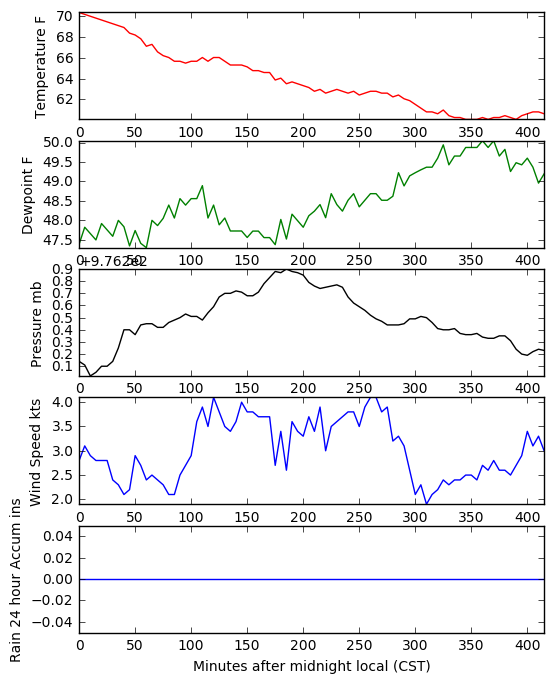

In [91]:
% run meteo.py nrmn 

In [ ]:
# %load meteo.py
import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib.pyplot as plt
import datetime
import urllib.request
import sys

now = datetime.datetime.now()

today = datetime.datetime.now().strftime("%Y%m%d")

station = 'nrmn'
date = today

#if len(sys.argv) >= 2 :
#    station = sys.argv[1]

#if len(sys.argv) >=3 :  
#    date = sys.argv[2]
    

filename = date + station + '.mts'  
url = 'http://www.mesonet.org/data/public/mesonet/mts/' + date[0:4] +  '/' + date[4:6] + '/' + date[6:] + '/' + filename

print (filename, url)
data_get = urllib.request.urlopen(url)


# my first funtion
def tmp2f (arg):
	ntmp = (9./5. * arg) + 32.
	return ntmp;

def dewpoint(rh, tmpc):
	H = (np.log10(rh) - 2)/0.4343 + (17.62 * tmpc)/(243.12 + tmpc)
	dptc = 243.12 * H / (17.62 - H)
	return dptc;

# Read in data from url www.mesonet.org


#x = np.loadtxt('20120229nrmn.mts', skiprows = 3, usecols = [3,12], unpack = True)
# second method allowing for headers to be read in as data
#x = np.genfromtxt('20120229nrmn.mts',dtype = None, names = True, skip_header = 2)

# time,relh,tmpc,wspd,pres = np.loadtxt('20120302nrmn.mts', skiprows = 3, usecols = [2,3,4,5,12], unpack = True)
# data read now includes test for missing data (-996,-995) as used by the OklaMesonet
# data = np.genfromtxt('data/20120317nrmn.mts', skip_header = 2 , dtype = None, names = True,
data = np.genfromtxt(data_get, skip_header = 2 , dtype = None, names = True,
					  missing_values = {None:["-996","-995"]}, usemask = True)


# post processing of data to facilitate plotting, this ignores missing data and uses the standard NaN(not a number)
# relh[relh==-996] = np.nan

# second method to mask(remove, ignore) data in preperation for display or analytics.

DPTF = tmp2f(dewpoint(data["RELH"], data["TAIR"]))
data["TAIR"] = tmp2f(data["TAIR"])

# coombined function call result to original data array to keep varable data in one structure
data = append_fields ( data, "DPTF", DPTF)


#fig = plt.figure(figsize=(12,10))
fig = plt.figure()
fig.set_size_inches(6,8)

# Set up of dictionary for use of strings and variable names
# Strings first owing to non hashing of arrays
# tuple added to include color
# varname = {'Rel. Humidity' : (relh,'green'),
# 		   'Dewpoint F'	   : (dptf, 'green'), 
# 		   'Pressure mb' : (pres,'black'),
# 		   'Temperature C' : (tmpc,'red'), 
# 		   'Windspeed knots' : (wspd, 'blue'),
# 		   'Temperature F' : (tmpf,'red'),}
varPlotColor = dict(TAIR = 'red',
                    RELH = 'green',
                    WSPD = 'blue',
                    WDIR = 'blue',
                    RAIN = 'blue',
                    DPTF = 'green',
                    PRES = 'black',
                    SRAD = 'dark yellow',
                    TIME = 'black')

varPlotLabel = dict(TAIR = 'Temperature F',
                    RELH = 'Rel Humidity %',
                    WSPD = 'Wind Speed kts',
                    WDIR = 'Wind Direction',
                    RAIN = 'Rain 24 hour Accum ins',
                    DPTF = 'Dewpoint F',
                    PRES = 'Pressure mb',
                    SRAD = 'Solar Insolation W/m2',
                    TIME = 'Minutes after midnight local (CST)')
                   

# Needed prior to the creation of the dictionary
pltlist = ["TAIR", "DPTF", "PRES", "WSPD", "RAIN"]

# careful when calling dictionary that tuple is split out and in the case of the y axis
# remember to keep the dictionary aray
for panel,metvar in enumerate(pltlist, start=1):
    plt.subplot(len(pltlist),1,panel)
    plt.plot(data['TIME'], data[metvar], varPlotColor[metvar])
    plt.xlabel(varPlotLabel["TIME"])
    plt.ylabel(varPlotLabel[metvar])
    plt.axis('tight')
plt.show()



In [96]:
type(data)

numpy.ma.core.MaskedArray

In [97]:
print(data)

[ (b'NRMN', 121, 0, 44, 70.34, 2.8, 2.8, 161, 11.6, 0.7, 5.0, 0.0, 976.34, 7, 22.1, 2.2, 21.3, 23.8, 21.5, 20.9, 21.8, 2.59, 2.4, 2.09, 47.384148560787345)
 (b'NRMN', 121, 5, 45, 70.16, 3.1, 3.1, 161, 10.8, 0.6, 4.9, 0.0, 976.31, 4, 21.9, 2.4, --, --, --, --, --, --, --, --, 47.81951703470493)
 (b'NRMN', 121, 10, 45, 69.98, 2.9, 2.8, 156, 10.8, 0.5, 4.2, 0.0, 976.22, 2, 21.8, 2.1, --, --, --, --, --, --, --, --, 47.65602137478762)
 (b'NRMN', 121, 15, 45, 69.80000000000001, 2.8, 2.8, 158, 9.4, 0.6, 4.2, 0.0, 976.25, 1, 21.7, 2.1, 21.2, 23.6, 21.4, 20.9, 21.8, --, --, --, 47.49251990573282)
 (b'NRMN', 121, 20, 46, 69.62, 2.8, 2.8, 153, 11.5, 0.5, 4.3, 0.0, 976.3, 0, 21.6, 2.1, --, --, --, --, --, --, --, --, 47.91454848852698)
 (b'NRMN', 121, 25, 46, 69.44, 2.8, 2.7, 151, 10.7, 0.5, 4.0, 0.0, 976.3, 0, 21.5, 2.0, --, --, --, --, --, --, --, --, 47.750612446784615)
 (b'NRMN', 121, 30, 46, 69.25999999999999, 2.4, 2.3, 158, 12.0, 0.5, 4.3, 0.0, 976.34, 0, 21.4, 1.8, 21.2, 23.5, 21.3, 20.9, 